In [151]:
import pandas as pd
import numpy as np
import networkx as nx  #for graph processing purposes
import matplotlib.pyplot as plt

# Read Data

In [360]:
lines = pd.read_csv('data/linie-mit-betriebspunkten.xls.csv')
zugzahlen = pd.read_csv('data/zugzahlen.xls.csv')
construction = pd.read_csv('data/construction-site.xls.csv')

In [153]:
display(lines)

,Abbreviation of the operating point,Name of the operating point,Abkuerzung Betriebspunkt Strecke,Name of operating point distance,LINIE,Kilometry of the operating point,LINIENNAME,VERWALTUNG,E,N,geopos,BPUIC,Didok Nummer,Name Haltestelle,lod
0,AAGB,Aarau GB,AAGB,Aarau GB,650,40.30900,Killwangen West - Lenzburg - Daniken Ost,SBB,2647397.625,1249489.859,"47.394529127, 8.06643793149",8502136,2136,Aarau GB,http://lod.opentransportdata.swiss/didok/8502136
1,AAT,Aathal,AAT,Aathal,740,77.38112,Rapperswil - Uster - Wallisellen Ost,SBB,2700290.162,1243636.271,"47.3359591251, 8.76562510867",8503124,3124,Aathal,http://lod.opentransportdata.swiss/didok/8503124
2,ABE,Aarberg,ABE,Aarberg,251,95.49304,Palezieux Est - Lyss Nord,SBB,2587845.752,1210402.487,"47.0445413042, 7.27869253926",8504404,4404,Aarberg,http://lod.opentransportdata.swiss/didok/8504404
3,ABO,Aarburg-Oftringen,ABO,Aarburg-Oftringen,500,43.00505,Basel SBB - Olten - Luzern,SBB,2635502.466,1241150.149,"47.3202684783, 7.90822265971",8502000,2000,Aarburg-Oftringen,http://lod.opentransportdata.swiss/didok/8502000
4,ABOS,Aarburg-Oftringen Sud (Abzw),ABO,Aarburg-Oftringen,452,0.83337,Rothrist - Zofingen (Kriegsschlaufe),SBB,2636164.469,1240407.291,"47.3135510897, 7.91691900278",8502013,2013,Aarburg-Oftringen Süd (Abzw),http://lod.opentransportdata.swiss/didok/8502013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,ZOER,Zurich Oerlikon,ZOER,Zurich Oerlikon,760,4.72282,Zurich Hardbrucke - Bulach,SBB,2683433.901,1251778.101,"47.4115300323, 8.54413989655",8503006,3006,Zürich Oerlikon,http://lod.opentransportdata.swiss/didok/8503006
1766,ZOLN,Zollikofen Nord (Abzw),ZOL,Zollikofen,450,98.11614,Olten Sud - Bern,SBB,2602072.221,1206293.590,"47.0076913913, 7.46588108097",8515371,15371,Zollikofen Nord (Abzw),http://lod.opentransportdata.swiss/didok/8515371
1767,ZVB,Zurich Vorbahnhof,ZVB,Zurich Vorbahnhof,758,1.98489,ZH Langstrasse - ZH Vorbahnhof (Gl. P24),SBB,2681364.531,1248735.091,"47.384422153, 8.51617021319",8503025,3025,Zürich Vorbahnhof,http://lod.opentransportdata.swiss/didok/8503025
1768,ZVBN,Zurich Vorbahnhof Nord,ZVB,Zurich Vorbahnhof,709,1.71569,Zue Vorbahnhof Nord - Zurich Altstetten,SBB,2681597.890,1248687.642,"47.3839665561, 8.51925165616",8515760,15760,Zürich Vorbahnhof Nord,http://lod.opentransportdata.swiss/didok/8515760


In [154]:
display(zugzahlen)

,PID,ISB,Strecke,Strecke_Bezeichnung,Strecke_Art,BP_Von_Abschnitt,BP_Von_Abschnitt_Bezeichnung,BP_Bis_Abschnitt,BP_Bis_Abschnitt_Bezeichnung,In_Richtung,...,BPUIC,Didok Nummer,Name Haltestelle,lod,geopos,tu-nummer,geopos_von,geopos_bis,geoshape,geo_point_2d
0,SBB_ALL_ETOY,SBB,1,Genève Aéroport - Lausanne,STRECKE,ALL,Allaman,ETOY,Etoy,False,...,8501042.0,1042.0,Etoy,http://lod.opentransportdata.swiss/didok/8501042,"46.4751727321, 6.42713532969",11.0,"6.39969709242, 46.4757535389","6.42713532969, 46.4751727321","{""type"": ""LineString"", ""coordinates"": [[6.3996...","46.4754631355, 6.41341621105"
1,SBB_CEL_MUR,SBB,1,Genève Aéroport - Lausanne,STRECKE,CEL,Céligny,MUR,Murat (diag),False,...,8501029.0,1029.0,Murat (diag),http://lod.opentransportdata.swiss/didok/8501029,"46.3535823538, 6.20634986541",11.0,"6.20008722493, 46.3479745705","6.20634986541, 46.3535823538","{""type"": ""LineString"", ""coordinates"": [[6.2000...","46.3507784622, 6.20321854517"
2,SBB_COP_FOU,SBB,1,Genève Aéroport - Lausanne,STRECKE,COP,Coppet,FOU,Founex,False,...,8501016.0,1016.0,Founex,http://lod.opentransportdata.swiss/didok/8501016,"46.3287835847, 6.19438330424",11.0,"6.18782739372, 46.3173935799","6.19438330424, 46.3287835847","{""type"": ""LineString"", ""coordinates"": [[6.1878...","46.3230885823, 6.19110534898"
3,SBB_CRA_NY,SBB,1,Genève Aéroport - Lausanne,STRECKE,CRA,Crans,NY,Nyon,True,...,8501030.0,1030.0,Nyon,http://lod.opentransportdata.swiss/didok/8501030,"46.38441894, 6.23596607924",11.0,"6.21246417593, 46.3587497583","6.23596607924, 46.38441894","{""type"": ""LineString"", ""coordinates"": [[6.2124...","46.3715843491, 6.22421512758"
4,SBB_CRA_NY,SBB,1,Genève Aéroport - Lausanne,STRECKE,CRA,Crans,NY,Nyon,False,...,8501030.0,1030.0,Nyon,http://lod.opentransportdata.swiss/didok/8501030,"46.38441894, 6.23596607924",11.0,"6.21246417593, 46.3587497583","6.23596607924, 46.38441894","{""type"": ""LineString"", ""coordinates"": [[6.2124...","46.3715843491, 6.22421512758"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5068,THURBO_TAEM_KRB,THURBO,80,Wil - Weinfelden - Tägermoos,STRECKE,TAEM,Tägerwilen Dorf,KRB,Kreuzlingen Bernrain,False,...,8506197.0,6197.0,Kreuzlingen Bernrain,http://lod.opentransportdata.swiss/didok/8506197,"47.6421145154, 9.16320415414",11.0,"9.13955954547, 47.6537211492","9.16320415414, 47.6421145154","{""type"": ""LineString"", ""coordinates"": [[9.1395...","47.6479178323, 9.15138184981"
5069,THURBO_TAEN_BTW,THURBO,80,Wil - Weinfelden - Tägermoos,STRECKE,TAEN,Tägerschen,BTW,Bettwiesen,False,...,8506182.0,6182.0,Bettwiesen,http://lod.opentransportdata.swiss/didok/8506182,"47.4986213574, 9.02077968719",11.0,"9.02479323479, 47.5093638855","9.02077968719, 47.4986213574","{""type"": ""LineString"", ""coordinates"": [[9.0247...","47.5039926214, 9.02278646099"
5070,THURBO_TAMO_TAEM,THURBO,80,Wil - Weinfelden - Tägermoos,STRECKE,TAMO,Tägermoos (Abzw),TAEM,Tägerwilen Dorf,False,...,8506198.0,6198.0,Tägerwilen Dorf,http://lod.opentransportdata.swiss/didok/8506198,"47.6537211492, 9.13955954547",11.0,"9.14964820751, 47.656995045","9.13955954547, 47.6537211492","{""type"": ""LineString"", ""coordinates"": [[9.1496...","47.6553580971, 9.14460387649"
5071,THURBO_TOA_TAEN,THURBO,80,Wil - Weinfelden - Tägermoos,STRECKE,TOA,Tobel-Affeltrangen,TAEN,Tägerschen,True,...,8506168.0,6168.0,Tägerschen,http://lod.opentransportdata.swiss/didok/8506168,"47.5093638855, 9.02479323479",11.0,"9.03370938412, 47.5213013698","9.02479323479, 47.5093638855","{""type"": ""LineString"", ""coordinates"": [[9.0337...","47.5153326276, 9.02925130945"


In [155]:
display(construction)

,Region,project,bp_from,bp_to,km from,km to,distance,Bemerkungen,date from,date to,amount of weeks,Umsetzung / Intervalltyp / Umleitung,reduction of capacity,bis_geopos,von Betriebspunkt
0,RWT,Puidoux - Palézieux : Wako lot 2.1,PUI,PAL,NaN,NaN,NaN,NaN,1/1/2023,6/29/2024,78.0,Sperre Strecke Nacht,0.50,"46.5427635573, 6.83787521203",Palézieux
1,RWT,Palézieux : Wako lot 2.2,NaN,NaN,NaN,NaN,NaN,NaN,1/1/2024,12/29/2024,52.0,NaN,NaN,NaN,NaN
2,? : ne correspond pas à Railsys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RWT,Viaduc de la Paudèze,PU,CU,0.850,4.144,-3.294,"EP terminée, B. Miraton",1/8/2024,12/31/2025,104.0,Sperre Strecke 24 Std,0.50,"46.4885617736, 6.72715145406",Cully
4,RWT,"MX-TER, PS Rue d'Etraz",MX,TER,23.806,28.644,-4.838,"EP treminée, D. Luce",1/1/2024,12/29/2024,52.0,Sperre Strecke Nacht,0.50,"46.4263815833, 6.9227068988",Territet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,RME,AS35 Safenwil-Walterswil: Bau Doppelspur inkl....,SAF,WAST,6.500,4.4,0.0044,NaN,1/1/2026,12/25/2030,260.0,Sperre Strecke Nacht,0.25,"47.3199235956, 7.96320362872",Walterswil-Striegel
459,RME,Umbau Knoten Olten,OL,OL,NaN,NaN,0,NaN,1/1/2030,12/27/2032,156.0,Sperre Bahnhof 24 Std,0.25,"47.3519347412, 7.90769966099",Olten
460,RME,Totalerneuer. Fahrleitung,MEG,MEG,10.043,11.45,0.01145,Bau Fundamente im 2022,4/2/2024,4/15/2024,2.0,Sperre Strecke 24 Std,0.25,"47.0501478318, 8.38306144451",Meggen
461,RME,"BZ Mitte, Migration rcs95 auf RCI der Zellen OTH",OTH,OI,65.500,95.9,0.0959,"Benzenschwil, Mellingen, Oberrüti, Othmarsinge...",1/1/2024,12/29/2024,52.0,Sperre Strecke Nacht,NaN,"47.1659261632, 8.4047794455",Oberrüti


# Create the graph

In [156]:
#her OP nin unique ismi var, bunlari kunlarak lines i dogru formata gecirebilirsin.

# Take the unique abbreviations and use them as the primary key (unique identifier)
line_abbrs = np.unique(lines.loc[:,"Abbreviation of the operating point"].to_numpy())

In [157]:
G = nx.Graph()

#dogrudan linesla calismak hatali, cunku lines'da bazi operation pointler birden fazla defa karsimiza cikiyor, her karsimiza cikisinda
#graph'a node eklemek istemiyoruz. Once lines dataframe ini her OP nin bir rowda kayitli oldugu bir formata donusturursen bu comment'in
#altindaki kod sana graph'i yaratir.


# Create the nodes.
# Data structure: One node (id, {'rest of the row'})
for index, row in lines.iterrows():
    G.add_nodes_from([(index, row.to_dict())])
    
    
# get unique line identifiers and iterate over them. 
line_ids = np.unique(lines.loc[:,"LINIE"].to_numpy())
for line_id in line_ids:
    # sort the line entries in the data frame taking the kilometry value into account to find the rows that are close to each other.
    operation_points = lines[lines["LINIE"] == line_id].sort_values(by='Kilometry of the operating point')
    operation_points = operation_points.index.to_numpy()
    
    # create an edge between the consecutive row entries such that the entries (rows) in the dataframe also currently a node in the graph have edges in between.
    edges = np.concatenate((operation_points[:-1][:,np.newaxis],operation_points[1:][:,np.newaxis]), axis=1)
    G.add_edges_from(edges)

/home/batom/miniconda3/envs/pai/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


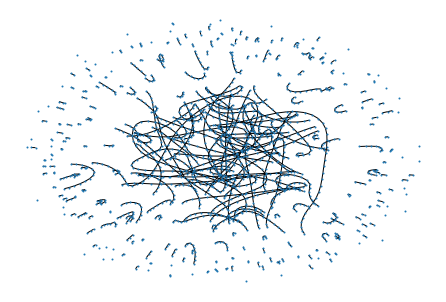

In [158]:
nx.draw(G, with_labels=False, node_size = 1)

In [159]:
# Change the graph such that it only has unique operating points as nodes rather than row entries in data frame.
for line_abbr in line_abbrs:
    
    # Take all the ids that correspond to a certain abbrevation
    ids = lines.index[lines["Abbreviation of the operating point"] == line_abbr].tolist()
    ids.sort()
    
    # merge those nodes together. It concatenates the rest of the information in the rows.
    for i in range(1,len(ids)):
        G = nx.contracted_nodes(G, ids[0], ids[i], self_loops=False)


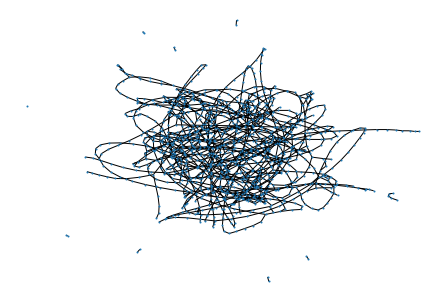

In [161]:
nx.draw(G_tilde, with_labels=False, node_size = 1)

# Create secondary datasets for ease of computation

In [162]:
# for every abbrevation create datalist putting all the lines it is involved in.
rows = [list(),list()]
for line_abbr in line_abbrs:
    rows[0].append(line_abbr)
    rows[1].append(lines.loc[lines["Abbreviation of the operating point"] == line_abbr]['LINIE'].tolist())

for i in range(len(rows[0])):
    rows[1][i].sort()
    
dict_lines = {'Lines': rows[1]}

abbr_lines = pd.DataFrame(dict_lines,index = rows[0])
display(abbr_lines)

,Lines
AA,"[649, 650]"
AAGB,[650]
AAT,[740]
ABE,[251]
ABO,"[451, 500]"
...,...
ZWG,[230]
ZWIE,"[717, 720]"
ZWIP,[751]
ZWOL,[720]


In [164]:
newrows = [list(),list()]
for line_abbr in line_abbrs:
    ids = lines.index[lines["Abbreviation of the operating point"] == line_abbr].tolist()
    ids.sort()
    newrows[0].append(line_abbr)
    newrows[1].append(ids[0])
    
id_abbr = pd.DataFrame(newrows[0],index = newrows[1], columns=["Abbrevation"])
display(id_abbr)

,Abbrevation
1057,AA
0,AAGB
1,AAT
2,ABE
3,ABO
...,...
1054,ZWG
355,ZWIE
1055,ZWIP
356,ZWOL


# Code for some checking and Testing

## Calculate how many abbrevations match with other datasets

In [218]:
construction_abbrs = np.unique(np.concatenate((construction["bp_from"].dropna().to_numpy(),construction["bp_to"].dropna().to_numpy())))

In [247]:
value = 0
for line_abbr in line_abbrs:
    if (len(construction.loc[construction["bp_from"] == line_abbr]) + len(construction.loc[construction["bp_to"] == line_abbr])) == 0:
        value += 1
print(value)

978


In [ ]:
display(construction_abbrs)

In [270]:
zugzahlen_abbrs = np.unique(np.concatenate((zugzahlen["BP_Von_Abschnitt"].to_numpy(),zugzahlen["BP_Bis_Abschnitt"].to_numpy())))
print(len(zugzahlen_abbrs))

1191


In [225]:
zugzahlen_pids = np.unique(zugzahlen["PID"].to_numpy())

# Create the graph from zugzahlen

In [239]:
G_big = nx.Graph()

for pid in zugzahlen_pids:
    weight = np.sum(zugzahlen.loc[zugzahlen["PID"] == pid]["Anzahl_Zuege"].to_numpy())
    u = zugzahlen.loc[zugzahlen["PID"] == pid].iloc[0]["BP_Von_Abschnitt"]
    v = zugzahlen.loc[zugzahlen["PID"] == pid].iloc[0]["BP_Bis_Abschnitt"]
    G_big.add_edge(u,v,weight=weight)

/home/batom/miniconda3/envs/pai/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


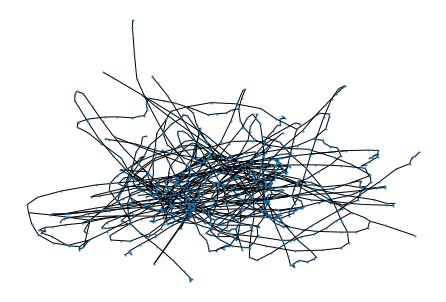

In [280]:
nx.draw(G_big, with_labels=False, node_size = 1)

In [276]:
print(len(line_abbrs))
value = 0
for line_abbr in construction_abbrs:
    if len(lines.loc[lines["Abbreviation of the operating point"] == line_abbr]) + len(zugzahlen.loc[zugzahlen["BP_Von_Abschnitt"] == line_abbr]) + len(zugzahlen.loc[zugzahlen["BP_Bis_Abschnitt"] == line_abbr]) == 0:
        value += 1
print(value)

1287
4


# Compute importances of the nodes

In [279]:
row = [list(),list()]
concat = np.concatenate((zugzahlen_abbrs,line_abbrs))
for node in G_big.nodes:
    row[0].append(node)
    row[1].append(G_big.degree(node,weight='weight'))
    
for point in concat:
    if point not in zugzahlen_abbrs:
        row[0].append(point)
        row[1].append(0)
    
id_importance = pd.DataFrame(row[1],index = row[0], columns=["Importance"])
display(id_importance)

,Importance
AAGB,528983
AAO,529079
ROHS,529081
AAT,174384
WZ,204305
...,...
ZOLN,0
ZSEO,0
ZULQ,0
ZUN,0


# Calculate distances between operating points using line information

In [358]:
from math import sin, cos, sqrt, atan2, radians

def calc_dist(lat1, lon1, lat2, lon2):
    
    # approximate radius of earth in km
    R = 6373.0

    dlon = radians(lon2) - radians(lon1)
    dlat = radians(lat2) - radians(lat1)

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [361]:
dist = []
for idx, entry in zugzahlen.iterrows():
    d1 = str(entry["geopos_von"])
    d2 = str(entry["geopos_bis"])
    if d1 == 'nan' or d2 == 'nan':
        dist.append(0)
        continue
    d1 = d1.split(',')
    d2 = d2.split(',')
    lat1 = float(d1[0])
    lon1 = float(d1[1])
    lat2 = float(d2[0])
    lon2 = float(d2[1])
    distance = calc_dist(lat1, lon1, lat2, lon2)
    dist.append(distance)
    
zugzahlen.insert(24,column="distance",value=dist)

# Calculate effect of construction sites to operation points

In [373]:
paths = [list(),list()]
for idx, entry in construction.iterrows():
    if entry["bp_from"] in zugzahlen_abbrs and entry['bp_to'] in zugzahlen_abbrs:
        paths[0].append(idx)
        if entry["bp_from"] == entry["bp_to"]:
            paths[1].append([entry["bp_from"]])
        else:
            paths[1].append(nx.shortest_path(G_big, source = entry["bp_from"], target = entry["bp_to"]))
            
dict_paths = {'Paths': paths[1]}

id_sp = pd.DataFrame(dict_paths,index = paths[0])
display(id_sp)

,Paths
0,"[PUI, MRL, PAL]"
3,"[PU, TAPI, LTY, VTE, CU]"
4,"[MX, TER]"
5,"[VIL, VEY, TER, MX]"
6,"[BR, BRTU, STDG]"
...,...
458,"[SAF, WAST]"
459,[OL]
460,[MEG]
461,"[OTH, HDK, DOT, DOTU, WO, WALS, BOSP, BOS, MI,..."


In [435]:
id_sp.to_csv("id_shortestpath.csv")

# Create graph with physical distances for finding the construction site

In [372]:
G_dist = nx.Graph()

for pid in zugzahlen_pids:
    weight = zugzahlen.loc[zugzahlen["PID"] == pid].iloc[0]["distance"]
    u = zugzahlen.loc[zugzahlen["PID"] == pid].iloc[0]["BP_Von_Abschnitt"]
    v = zugzahlen.loc[zugzahlen["PID"] == pid].iloc[0]["BP_Bis_Abschnitt"]
    G_dist.add_edge(u,v,weight=weight)

# Find which strecken the construction site covers

In [459]:
rows = [list(),list()]
for idx, entry in id_sp.iterrows():
    if len(id_sp.loc[idx]["Paths"]) == 1:
        rows[0].append(idx)
        empty = list()
        for neighbor in G_dist.neighbors(abbr):
            empty.append([abbr,neighbor])
        rows[1].append(empty)
    else:
        empty = list()
        for i in range(len(id_sp.loc[idx]["Paths"]) - 1):
            empty.append([id_sp.loc[idx]["Paths"][i], id_sp.loc[idx]["Paths"][i+1]])
        rows[0].append(idx)
        rows[1].append(empty)


In [460]:
dict_rows = {'Edges': rows[1]}

id_edges = pd.DataFrame(dict_rows,index = rows[0])
display(id_edges)

,Edges
0,"[[PUI, MRL], [MRL, PAL]]"
3,"[[PU, TAPI], [TAPI, LTY], [LTY, VTE], [VTE, CU]]"
4,"[[MX, TER]]"
5,"[[VIL, VEY], [VEY, TER], [TER, MX]]"
6,"[[BR, BRTU], [BRTU, STDG]]"
...,...
458,"[[SAF, WAST]]"
459,"[[OL, OLH], [OL, ABO], [OL, OLNO], [OL, OLRB],..."
460,"[[MEG, MEGZ], [MEG, MERL]]"
461,"[[OTH, HDK], [HDK, DOT], [DOT, DOTU], [DOTU, W..."


# Now we create the geolocation data.

In [461]:
id_edges.to_csv("id_edges.csv")

In [470]:
rows = [list(),list()]
for idx, entry in id_edges.iterrows():
    sites = entry["Edges"]
    empty = list()
    for site in sites:
        string = 'SBB_' + site[0] + "_" + site[1]
        if len(zugzahlen.loc[zugzahlen["PID"] == string]) != 0:
            empty.append(zugzahlen.loc[zugzahlen["PID"] == string].iloc[0]['geoshape'])
        elif len(zugzahlen.loc[zugzahlen["PID"] == 'SBB_' + site[1] + "_" + site[0]]) != 0: 
            string = 'SBB_' + site[1] + "_" + site[0]
            empty.append(zugzahlen.loc[zugzahlen["PID"] == string].iloc[0]['geoshape'])
    rows[0].append(idx)
    rows[1].append(empty)

In [471]:
dict_rows = {'geshape': rows[1]}

id_geoshape = pd.DataFrame(dict_rows,index = rows[0])
display(id_geoshape)

,geshape
0,"[{""type"": ""LineString"", ""coordinates"": [[6.765..."
3,"[{""type"": ""LineString"", ""coordinates"": [[6.681..."
4,"[{""type"": ""LineString"", ""coordinates"": [[6.910..."
5,"[{""type"": ""LineString"", ""coordinates"": [[6.927..."
6,"[{""type"": ""LineString"", ""coordinates"": [[7.988..."
...,...
458,"[{""type"": ""LineString"", ""coordinates"": [[7.963..."
459,"[{""type"": ""LineString"", ""coordinates"": [[7.897..."
460,"[{""type"": ""LineString"", ""coordinates"": [[8.374..."
461,"[{""type"": ""LineString"", ""coordinates"": [[8.214..."


In [472]:
id_geoshape.to_csv("id_geoshape.csv")